<a href="https://colab.research.google.com/github/Dineshjeevan/wednesday/blob/master/Final_code_for_PHD_MODIFIED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**“EFFECTUAL PROPHECY OF HEART DISEASE  PROGNOSIS USING MACHINE LEARNING TECHNIQUES”**

**IMPORTING LIBRARIES** 

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt#FOR PLOTING GRAPHS
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

['.config', 'sample_data']


**READ THE CSV HEART DATA BASE**

In [4]:
data = pd.read_csv("/content/sample_data/heart1.csv")
print(data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

**DATA ANALYSIS**

**CHEACKING POSSIVE AND NEGATIVE DATA POINTS IN DATABASE**

1    526
0    499
Name: target, dtype: int64


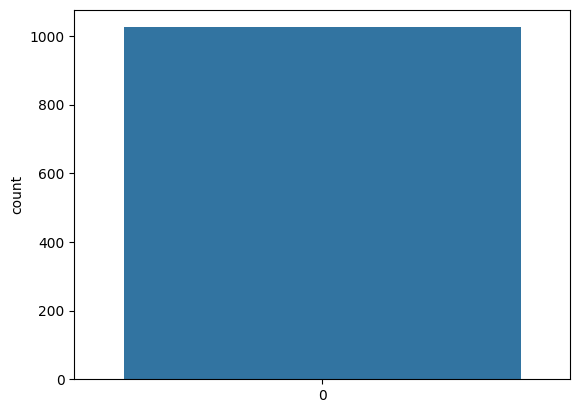

In [5]:
y = data["target"]

sns.countplot(y)


target_temp = data.target.value_counts()

print(target_temp)

**PRINTING THE FIRST 5 DATA POINTS**

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**DESCRIBE THE DATABASE**

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**READIONG THE INFORMATION**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**FINDING THE SIZE OF DATA**

In [9]:
data.shape

(1025, 14)

**DATA VISUALIZATION**

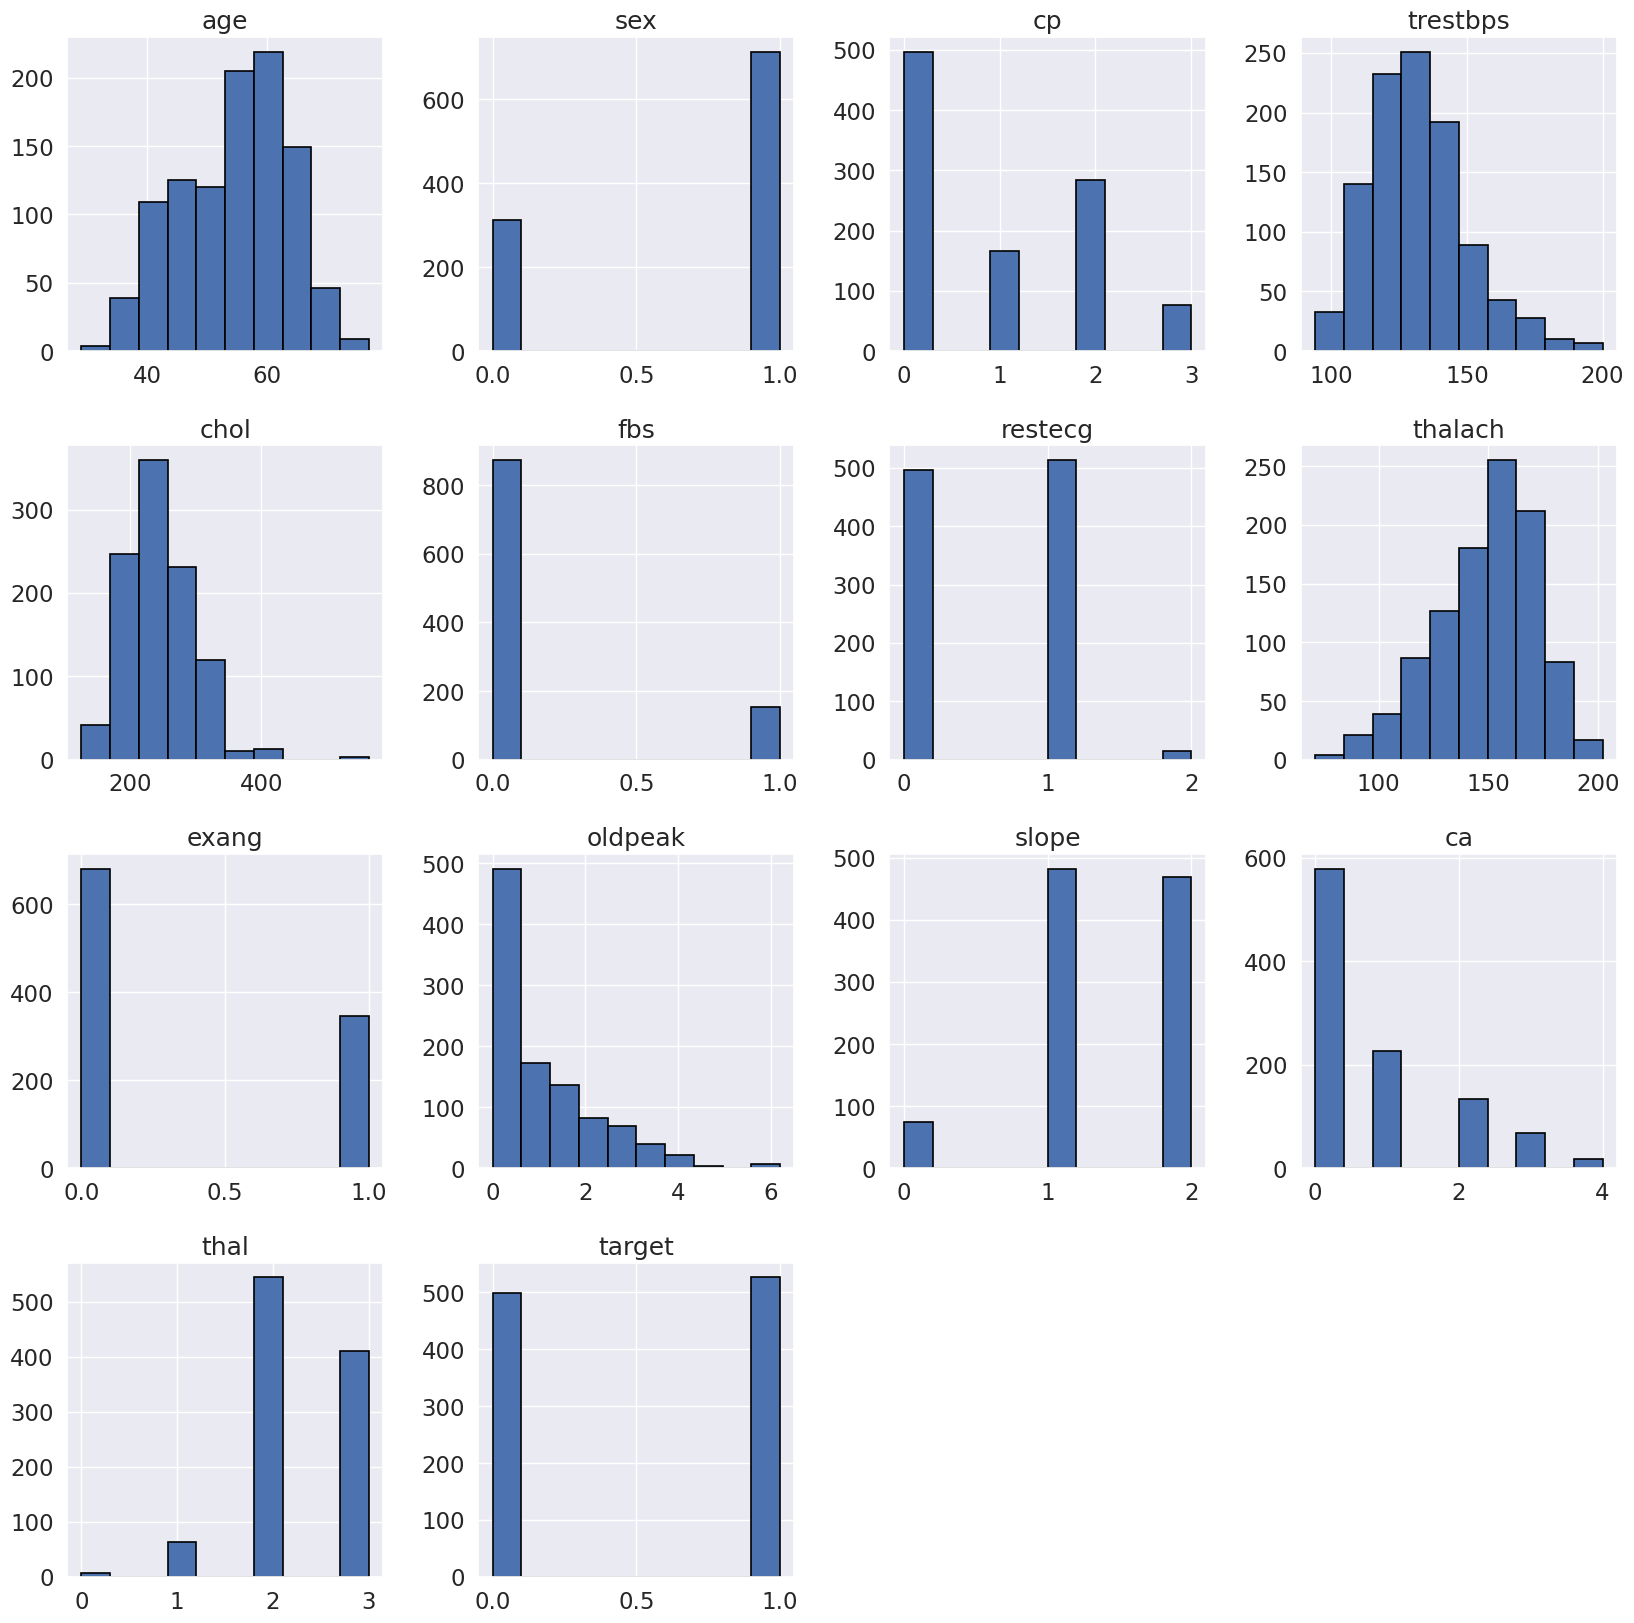

In [10]:
# TO Get an overview distribution of each column
sns.set(font_scale=1.5)
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [12]:
sns.factorplot('sex', data=data, kind='count')

AttributeError: ignored

In [13]:
sns.factorplot('target', data=data, hue='sex', kind='count')

AttributeError: ignored

In [15]:
sns.factorplot('target', data=data, kind='count')

AttributeError: ignored

<Axes: >

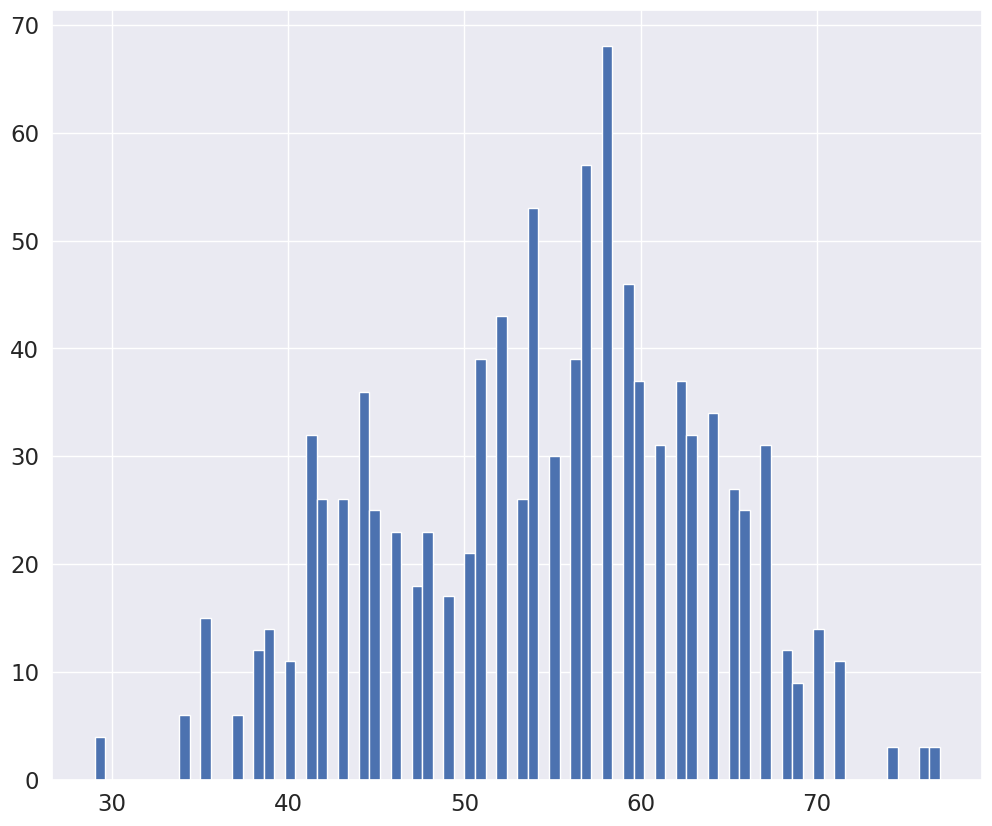

In [14]:
plt.figure(figsize=(12, 10))
data.age.hist(bins=80)

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs :

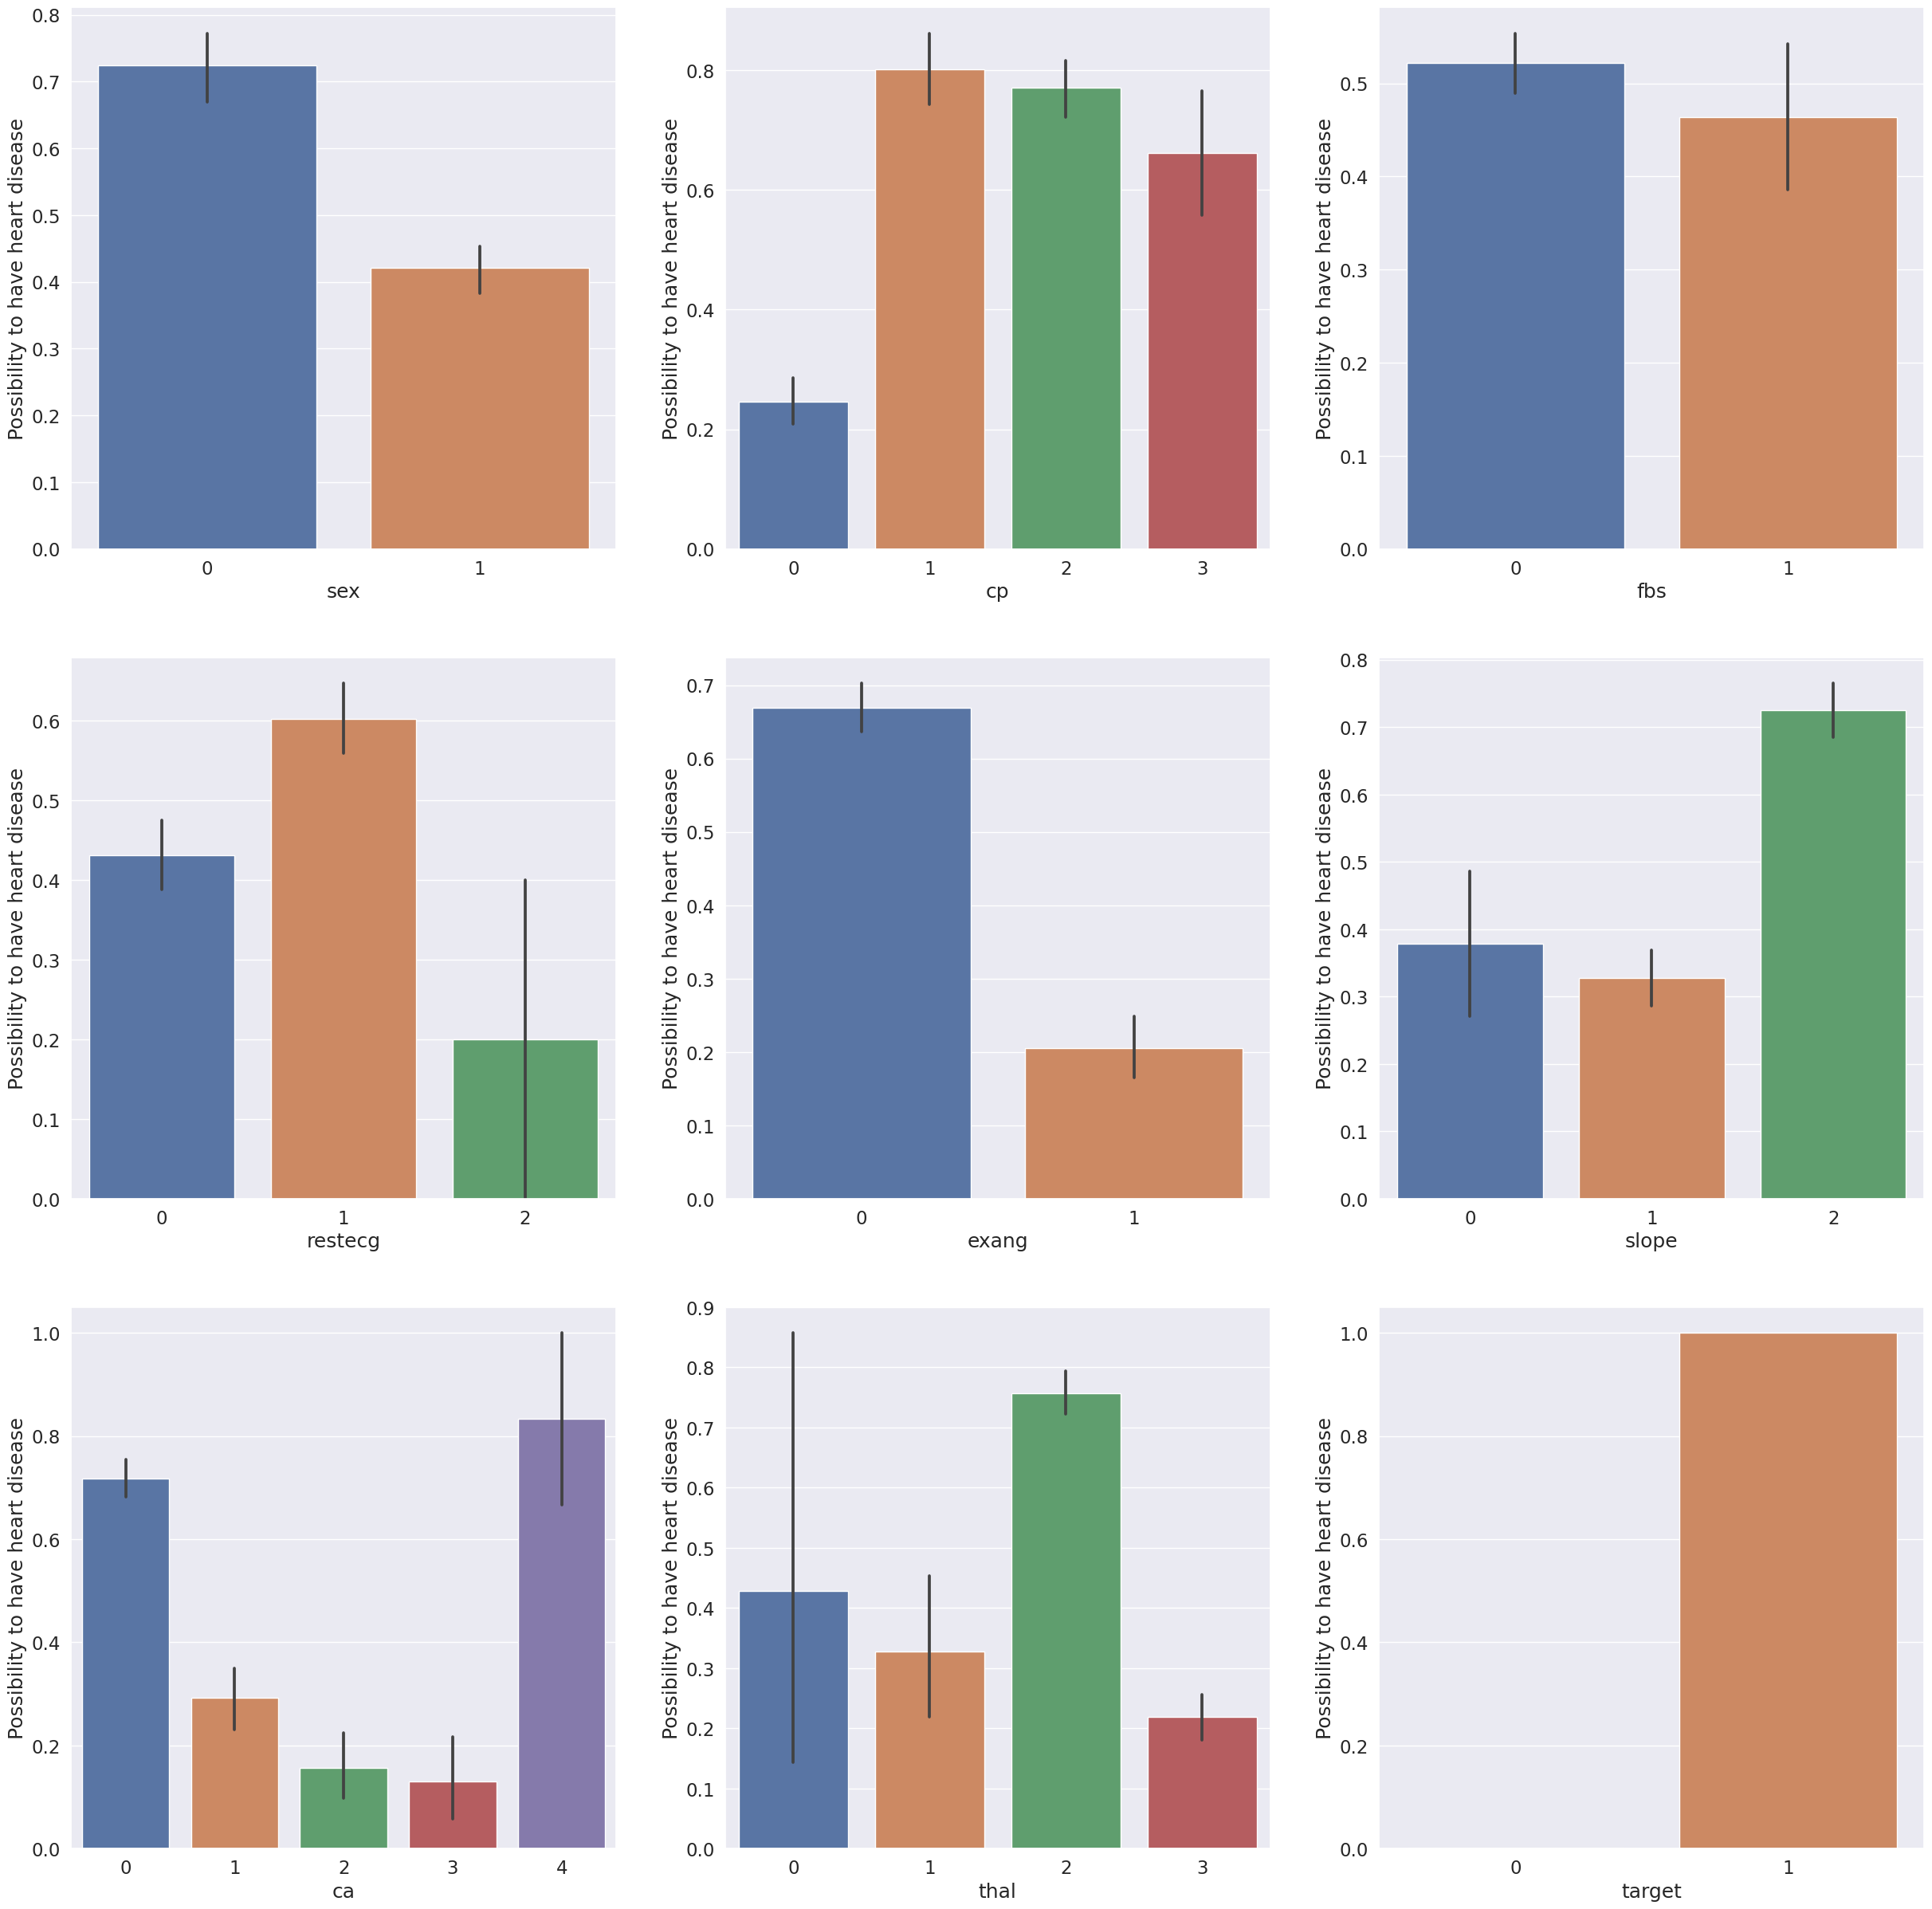

In [16]:
categorical_values = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_values.append(column)

categorical_values

plt.figure(figsize=(30, 30))
for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=f"{column}", y='target', data=data)
    plt.ylabel('Possibility to have heart disease')
    plt.xlabel(f'{column}')

**CORRELATION MATRIX**

In [17]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

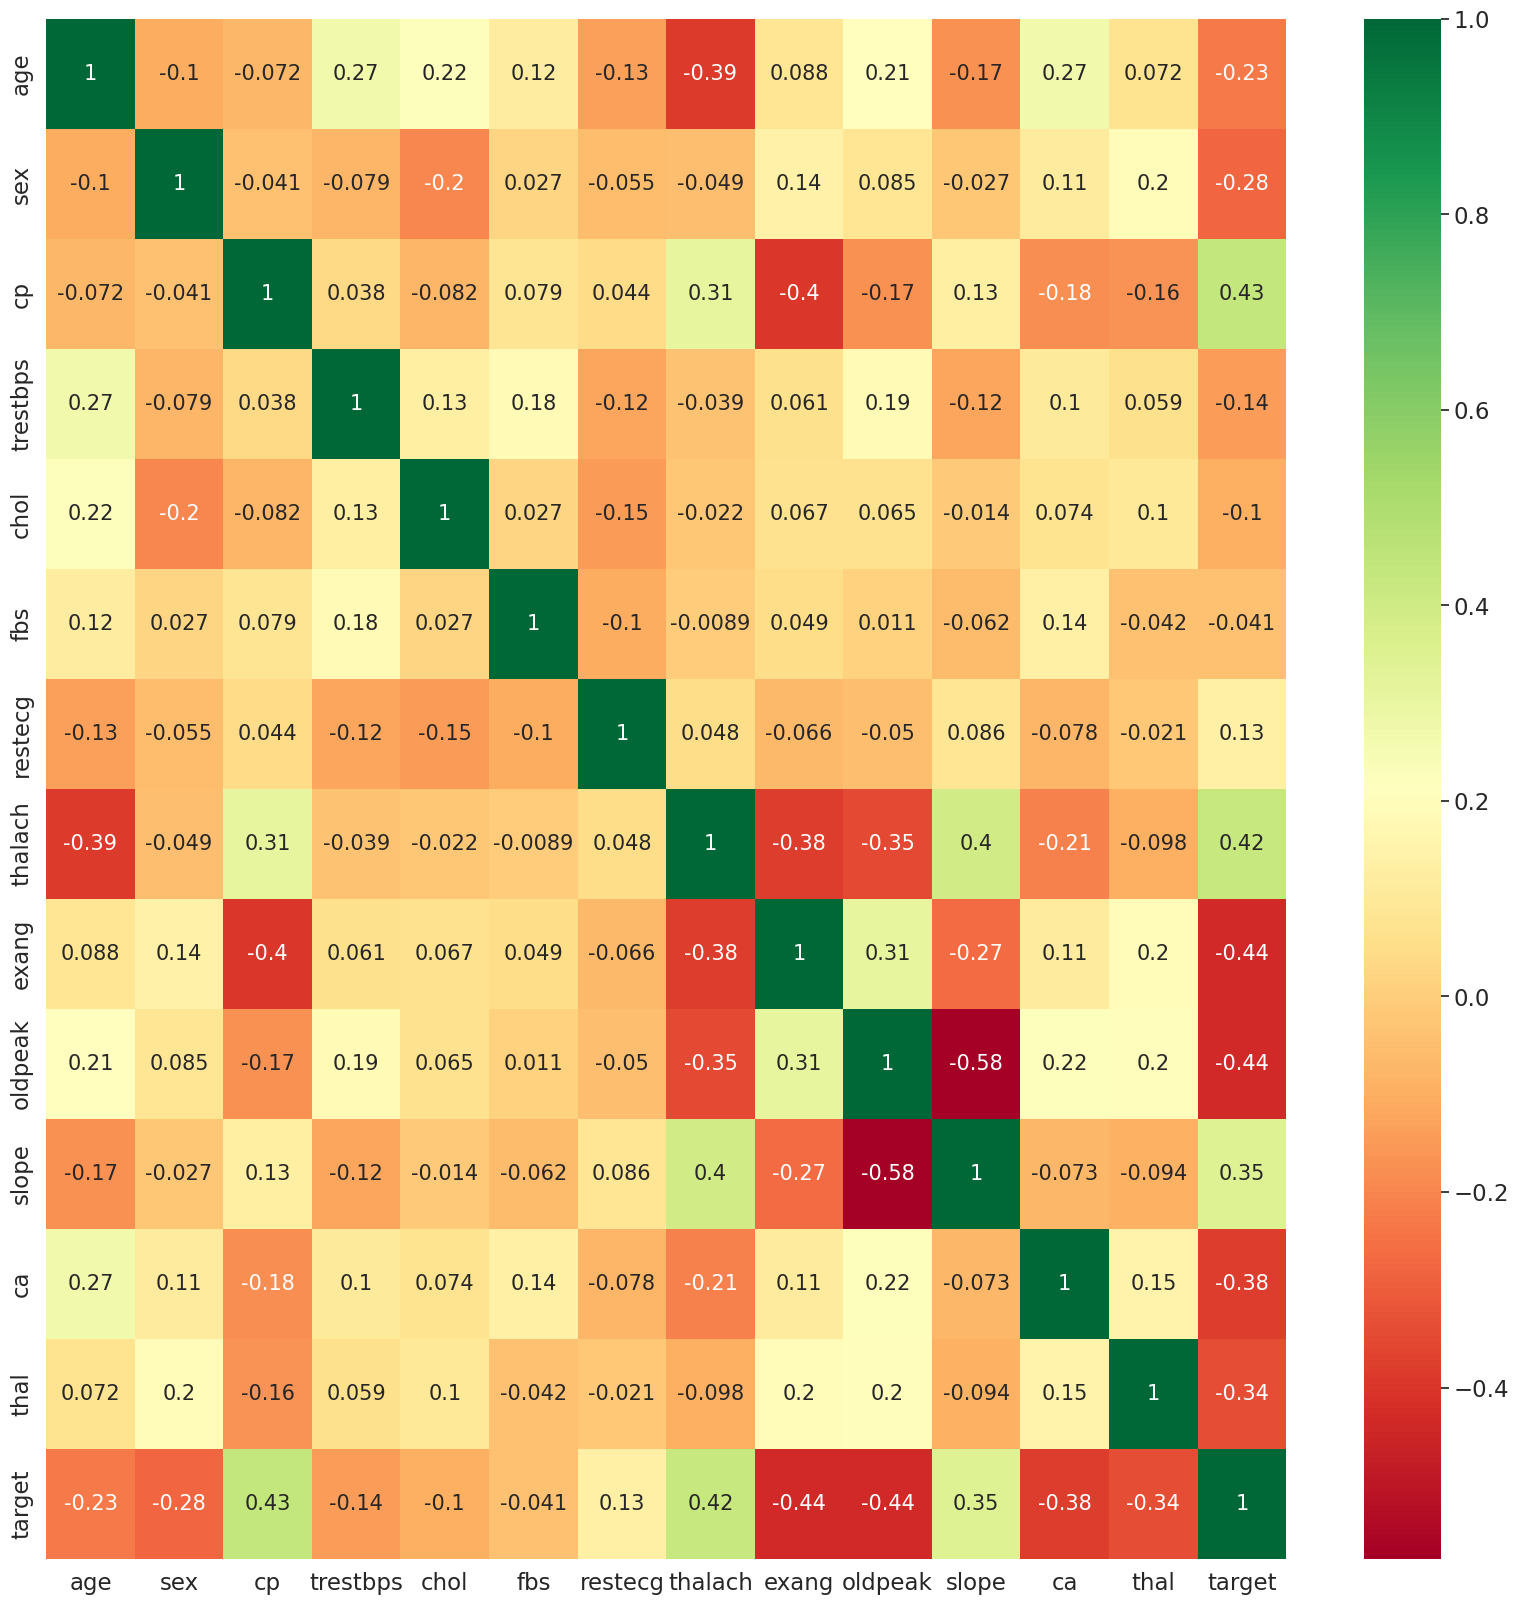

In [18]:
corr_matrix = data.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

**SPLITTING OUTPUT AND INPUT**

In [ ]:
x = data.drop('target',axis = 1) 
y = data.target
print(x)
print("\n\n\n")
print(y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

**70% training and 30% test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,random_state=109) 
print(x_train)
print('\n')
print(y_train)
print('\n')
print(x_test)
print('\n')
print(y_test)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
301    51    1   2        94   227    0        1      154      1      0.0   
891    64    0   0       180   325    0        1      154      1      0.0   
739    52    1   0       128   255    0        1      161      1      0.0   
19     58    1   2       140   211    1        0      165      0      0.0   
841    35    0   0       138   183    0        1      182      0      1.4   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
801    63    1   3       145   233    1        0      150      0      2.3   
587    59    1   0       164   176    1        0       90      0      1.0   
399    63    1   3       145   233    1        0      150      0      2.3   
1008   42    1   1       120   295    0        1      162      0      0.0   
141    63    0   0       124   197    0        1      136      1      0.0   

      slope  ca  thal  
301       2   1     3  
891       2   0     2  
739

**SUPPORT VECTOR MACHINE**

**LINEAR SVM**

In [ ]:
#Create a svm Classifier
ml = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
ml.fit(x_train, y_train)


#Predict the response for test dataset
ml_pred = ml.predict(x_test)
ml_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,

**ACCURACY OF LINEAR SVM**


In [ ]:
ml.score(x_test,y_test)

0.8733766233766234

In [ ]:
score_ml = round(accuracy_score(ml_pred,y_test)*100,2)

print("The accuracy score achieved using linear svm is: "+str(score_ml)+" %")

The accuracy score achieved using linear svm is: 87.34 %


In [ ]:
confusion_matrix(y_test,ml_pred)

array([[124,  26],
       [ 13, 145]])

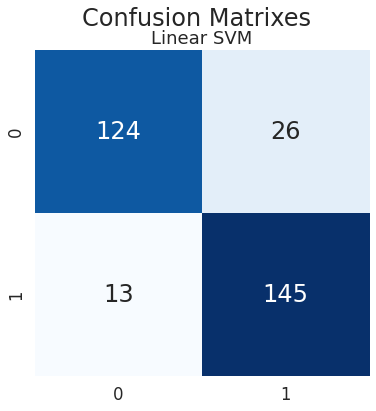

In [ ]:
plt.figure(figsize=(6,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

#plt.subplot(2,3,1)
plt.title("Linear SVM")
sns.heatmap(confusion_matrix(y_test,ml_pred),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [ ]:
# generate classification report using predictions 
print(metrics.classification_report(y_test, ml_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.86       150
           1       0.85      0.92      0.88       158

    accuracy                           0.87       308
   macro avg       0.88      0.87      0.87       308
weighted avg       0.88      0.87      0.87       308



**POLYNOMIAL SVM**

In [ ]:
#Create a svm Classifier
mp = svm.SVC(kernel='poly',C=1000,degree=3) # polynomial

#Train the model using the training sets
mp.fit(x_train, y_train)

#Predict the response for test dataset
mp_pred = mp.predict(x_test)

**ACCURACY OF POLYNOMIAL SVM**

In [ ]:
mp.score(x_test,y_test)

0.8766233766233766

In [ ]:
score_mp = round(accuracy_score(mp_pred,y_test)*100,2)

print("The accuracy score achieved using polynomial snm is: "+str(score_mp)+" %")

The accuracy score achieved using polynomial snm is: 87.66 %


In [ ]:
confusion_matrix(y_test,mp_pred)

array([[123,  27],
       [ 11, 147]])

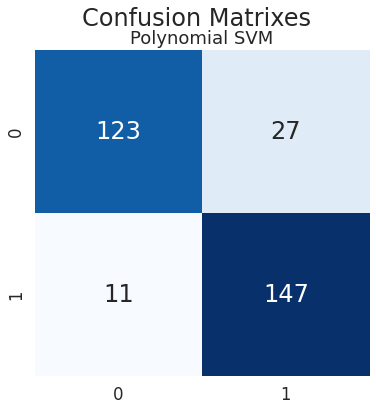

In [ ]:
plt.figure(figsize=(6,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

#plt.subplot(2,3,1)
plt.title("Polynomial SVM")
sns.heatmap(confusion_matrix(y_test,mp_pred),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [ ]:
# generate classification report using predictions 
print(metrics.classification_report(y_test, mp_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       150
           1       0.84      0.93      0.89       158

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308



**RADIAL BASIS FUNCTION SVM**

In [ ]:
#Create a svm Classifier
mr = svm.SVC(kernel='rbf',gamma=10,C=1000) # RBF

#Train the model using the training sets
mr.fit(x_train, y_train)

#Predict the response for test dataset
mr_pred = mr.predict(x_test)

**ACCURACY OF RADIAL BASIS FUNCTION SVM**

In [ ]:
mr.score(x_test,y_test)

0.9772727272727273

In [ ]:
score_rbf = round(accuracy_score(mr_pred,y_test)*100,2)

print("The accuracy score achieved using Radial basis function svm is: "+str(score_rbf)+" %")

The accuracy score achieved using Radial basis function svm is: 97.73 %


In [ ]:
confusion_matrix(y_test,mr_pred)

array([[143,   7],
       [  0, 158]])

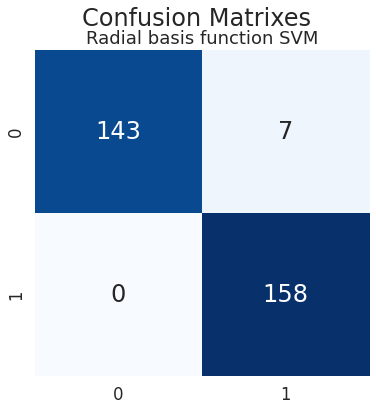

In [ ]:
plt.figure(figsize=(6,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

#plt.subplot(2,3,1)
plt.title("Radial basis function SVM")
sns.heatmap(confusion_matrix(y_test,mr_pred),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [ ]:
# generate classification report using predictions 
print(metrics.classification_report(y_test, mr_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       150
           1       0.96      1.00      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    dt_pred = dt.predict(x_test)
    current_accuracy = round(accuracy_score(dt_pred,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

**ACCURACY OF DECISION TREE**

In [ ]:
dt.score(x_test,y_test)

0.9902597402597403

In [ ]:
score_dt = round(accuracy_score(dt_pred,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 99.03 %


In [ ]:
confusion_matrix(y_test,dt_pred)

array([[150,   0],
       [  3, 155]])

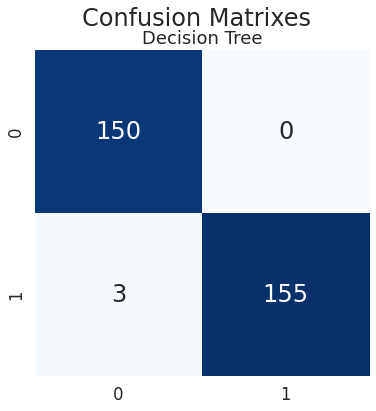

In [ ]:
plt.figure(figsize=(6,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

#plt.subplot(2,3,1)
plt.title("Decision Tree")
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [ ]:
# generate classification report using predictions 
print(metrics.classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf= RandomForestClassifier(random_state=x)
    rf.fit(x_train,y_train)
    rf_pred = rf.predict(x_test)
    current_accuracy = round(accuracy_score(rf_pred,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

**ACCURACY OF RANDOM FOREST**

In [ ]:
rf.score(x_test,y_test)

0.9902597402597403

In [ ]:
score_rf = round(accuracy_score(rf_pred,y_test)*100,2)

print("The accuracy score achieved using Random forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random forest is: 99.03 %


In [ ]:
confusion_matrix(y_test,rf_pred)

array([[150,   0],
       [  3, 155]])

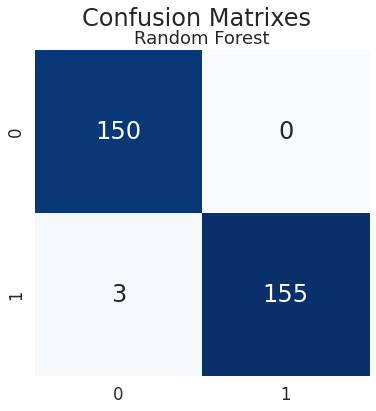

In [ ]:
plt.figure(figsize=(6,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

#plt.subplot(2,3,1)
plt.title("Random Forest")
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [ ]:
# generate classification report using predictions 
print(metrics.classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



**K NEAREST NEIGHBOR**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
max_accuracy=0
bk=0

for k in range(300):
    if k==0:
      continue
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    knn_pred= knn.predict(x_test)
    current_accuracy = round(accuracy_score(knn_pred,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        bk= k

knn = KNeighborsClassifier(n_neighbors=bk)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

**ACCURACY OF K NEAREST NEIGHBOR**

In [ ]:
knn.score(x_test,y_test)

0.9707792207792207

In [ ]:
score_knn = round(accuracy_score(knn_pred,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 97.08 %


In [ ]:
confusion_matrix(y_test,knn_pred)

array([[147,   3],
       [  6, 152]])

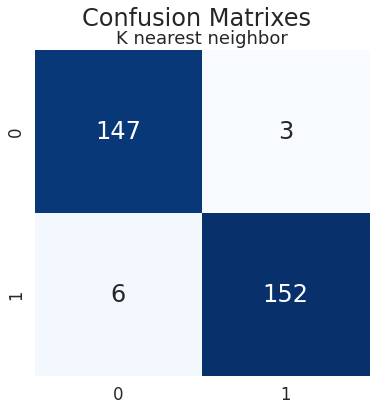

In [ ]:
plt.figure(figsize=(6,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

#plt.subplot(2,3,1)
plt.title("K nearest neighbor")
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [ ]:
# generate classification report using predictions 
print(metrics.classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       150
           1       0.98      0.96      0.97       158

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



**Final Score**

In [ ]:
scores = [score_ml,score_mp,score_rbf,score_dt,score_rf,score_knn]
algorithms = ["Logistic Regression","Polynomial","Raduial basis function","Decision Tree","Random Forest","K-Nearest Neighbors"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 87.34 %
The accuracy score achieved using Polynomial is: 87.66 %
The accuracy score achieved using Raduial basis function is: 97.73 %
The accuracy score achieved using Decision Tree is: 99.03 %
The accuracy score achieved using Random Forest is: 99.03 %
The accuracy score achieved using K-Nearest Neighbors is: 97.08 %


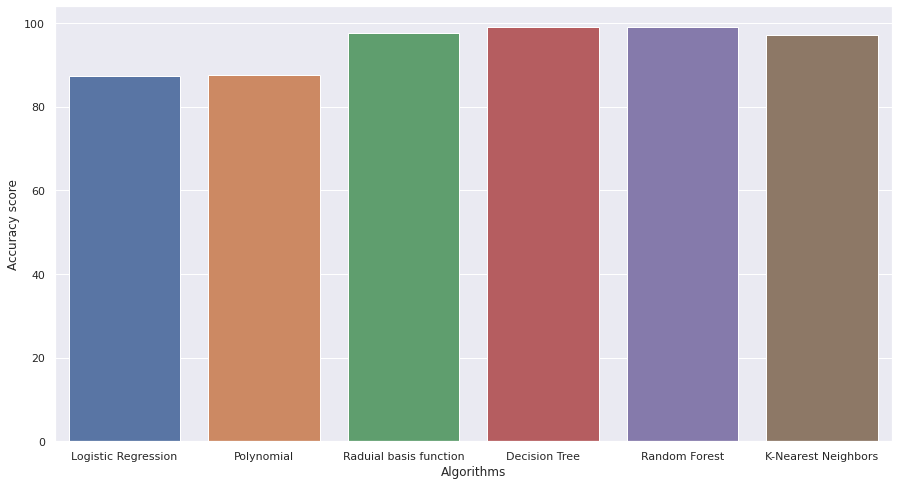

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

**FINDING TEST ACCURASY FOR NEW UNSEEN 303 DATA IN A DIFFRENT DATASET**

In [ ]:
testdata=pd.read_csv("/content/heart2.csv")
x_newdata=testdata.drop('target',axis=1)
y_accual=testdata.target

In [ ]:
y_pred=ml.predict(x_newdata)

y_accual

confusion_matrix(y_accual,y_pred)

array([[108,  30],
       [ 16, 149]])

In [ ]:
# SVM TEST ACCURACY WITH NEW DATABASE 97.7%

In [ ]:
y_predrf=rf.predict(x_newdata)

confusion_matrix(y_accual,y_predrf)

array([[138,   0],
       [  1, 164]])

In [ ]:
# THE TEST ACCURACY OF RF FOR NEW UNSEEN DATA IS 99.6%

In [ ]:
testdata=pd.read_csv("/content/heart2.csv")
x_newdata=testdata.drop('target',axis=1)
y_accual=testdata.target

y_pred_dt=dt.predict(x_newdata)
print(y_pred_dt)
print('\n\n')
print(y_accual)

confusion_matrix(y_accual,y_pred_dt)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]



0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


array([[138,   0],
       [  1, 164]])

**SO, THE TEST ACCURACY FOR DECISION TREE FOR NEW DATA SET IS 99.66%**

In [ ]:
y_predknn=knn.predict(x_newdata)

confusion_matrix(y_accual,y_predknn)

array([[137,   1],
       [  2, 163]])

In [ ]:
# THE TEST ACCURACY OF KNN FOR UNSEEN DATASET IS 99%

**TEST SINGLE PERSON DATA**

In [ ]:
print("enter the patient data (13 attributes )")
pdata=pd.read_csv("/content/ptest.csv")
y_pred_dt1=dt.predict(pdata)
print(y_pred_dt1)
print('\n')
if y_pred_dt1[0]==0:
  print("The patient has no heart disease")
else:
  print("The patient have heart disease") 

enter the patient data (13 attributes )
[0]


The patient has no heart disease


In [ ]:
print("Enter the patient data (13 attributes )")
dist={}
dist["age"]=int(input("enter your age: "))
dist["sex"]=int(input("enter your sex (0-female 1-for male: "))
dist["cp"]=int(input("enter cp value: "))
dist["trestbps"]=int(input("enter trestbps: "))
dist["chol"]=int(input("enter chol: "))
dist["fbs"]=int(input("enter fbs value: "))
dist["restecg"]=int(input("enter restecg: "))
dist["thalach"]=int(input("enter thalach: "))
dist["exang"]=int(input("enter exang: "))
dist["old peak"]=float(input("enter oldpeak: "))
dist["slop"]=int(input("enter slop: "))
dist["ca"]=int(input("enter ca: "))
dist["thal"]=int(input("enter thal: "))
df=pd.DataFrame(dist,index=[0])
print(df)
print('\n')

y_pred_dt2=dt.predict(df)
print(y_pred_dt2)
print('\n')

if y_pred_dt2[0]==0:
  print("The patient has no heart disease")
else:
  print("The patient have heart disease") 

Enter the patient data (13 attributes )
enter your age: 52
enter your sex (0-female 1-for male: 1
enter cp value: 0
enter trestbps: 125
enter chol: 212
enter fbs value: 0
enter restecg: 1
enter thalach: 68
enter exang: 0
enter oldpeak: 1
enter slop: 2
enter ca: 2
enter thal: 3
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  old peak  slop  \
0   52    1   0       125   212    0        1       68      0       1.0     2   

   ca  thal  
0   2     3  


[0]


The patient has no heart disease


In [ ]:
def PHD():
  print("Enter the patient data (13 attributes )")
  dist={}
  dist["age"]=int(input("enter your age: "))
  dist["sex"]=int(input("enter your sex (0-female 1-for male: "))
  dist["cp"]=int(input("enter cp value: "))
  dist["trestbps"]=int(input("enter trestbps: "))
  dist["chol"]=int(input("enter chol: "))
  dist["fbs"]=int(input("enter fbs value: "))
  dist["restecg"]=int(input("enter restecg: "))
  dist["thalach"]=int(input("enter thalach: "))
  dist["exang"]=int(input("enter exang: "))
  dist["old peak"]=float(input("enter oldpeak: "))
  dist["slop"]=int(input("enter slop: "))
  dist["ca"]=int(input("enter ca: "))
  dist["thal"]=int(input("enter thal: "))
  df=pd.DataFrame(dist,index=[0])
  #print(df)
  #print('\n')

  y_pred_dt2=dt.predict(df)
  #print(y_pred_dt2)
  #print('\n')
  if y_pred_dt2[0]==0:
    print("The patient has no heart disease")
  else:
    print("\n\n The patient have heart disease") 

PHD()

Enter the patient data (13 attributes )
enter your age: 66
enter your sex (0-female 1-for male: 0
enter cp value: 3
enter trestbps: 150
enter chol: 226
enter fbs value: 0
enter restecg: 1
enter thalach: 114
enter exang: 0
enter oldpeak: 2.6
enter slop: 0
enter ca: 0
enter thal: 2


 The patient have heart disease
